# Modelo de Regresión Lineal para Una Variable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import normaltest
from yellowbrick.regressor import ResidualsPlot

<small>

**Nota:** Se hará la separación de train y test (70/30) del CSV de _train_ debido a que el archivo de _test_ no contiene la variable _SalePrice_ para realizar las comparaciones.
</small>


#### Carga de archivos


In [4]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")  

#### Selección de variables


In [5]:
X = train[['OverallQual']]
y = np.log(train['SalePrice'])

<small>

**Nota:** La selección de _OverallQual_ fue debido a que tiene la correlación más alta de las variables (0.79), con el precio _(SalePrice)_. Además de tener respaldo teórico y alta carga siendo del primer componente principal (PC1).
</small>


#### División traim (70%) y test (30%)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

#### Ajuste de modelo de regresión lineal


In [7]:
y_train_values = y_train.values  
y_test_values = y_test.values  
x_train_values = X_train['OverallQual'].values.reshape(-1,1)  
x_test_values = X_test['OverallQual'].values.reshape(-1,1)  

lm = LinearRegression()
lm.fit(x_train_values, y_train_values)

LinearRegression()

#### Predicción sobre el test set


In [8]:
p_length_pred = lm.predict(x_test_values)

#### Coeficientes (y = mx + c)


In [9]:
m = lm.coef_[0]
c = lm.intercept_
label = r'SalePrice = %0.4f * OverallQual + %0.4f' % (m, c)
print(label)

SalePrice = 0.2331 * OverallQual + 10.6007


#### Gráfico de dispersión sobre la recta de regresión


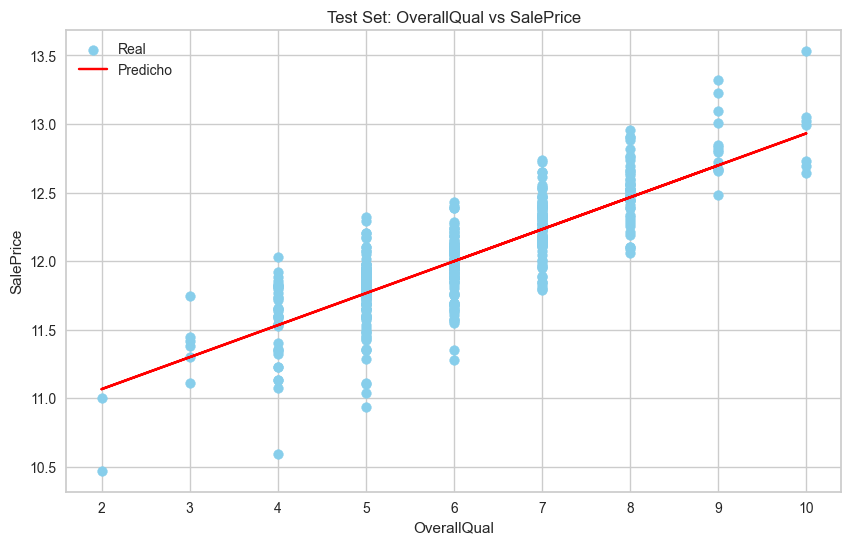

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test_values, y_test_values, color='skyblue', label='Real')
plt.plot(x_test_values, p_length_pred, color="red", label='Predicho')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Test Set: OverallQual vs SalePrice")
plt.legend()
plt.grid(True)
plt.show()

### Métricas de evaluación


In [11]:
print("Mean Squared Error: %.2f" % mean_squared_error(y_test_values, p_length_pred))
print("R squared: %.2f" % r2_score(y_test_values, p_length_pred))

Mean Squared Error: 0.05
R squared: 0.69


### Calculo y muestra de residuales


In [12]:
residuales = y_test_values - p_length_pred

for i in range(len(y_test_values)):
    print(y_test_values[i], p_length_pred[i], " --> ", "\tDIFF:", residuales[i])


11.947949375319936 11.99917821356001  -->  	DIFF: -0.05122883824007296
12.691580461311874 12.465343119137437  -->  	DIFF: 0.22623734217443747
11.652687407345388 11.766095760771295  -->  	DIFF: -0.11340835342590694
11.976659481202368 11.99917821356001  -->  	DIFF: -0.022518732357641014
12.661913960963405 12.69842557192615  -->  	DIFF: -0.036511610962744356
11.231887935237117 11.533013307982582  -->  	DIFF: -0.30112537274546547
12.649154617209645 12.232260666348722  -->  	DIFF: 0.4168939508609224
11.891361900690473 11.99917821356001  -->  	DIFF: -0.10781631286953619
11.344506813345266 11.533013307982582  -->  	DIFF: -0.18850649463731628
11.816726919301892 11.766095760771295  -->  	DIFF: 0.05063115853059763
11.884489021402711 12.232260666348722  -->  	DIFF: -0.3477716449460111
11.77528972943772 11.766095760771295  -->  	DIFF: 0.009193968666425079
11.302204433654575 11.299930855193868  -->  	DIFF: 0.002273578460707526
12.273731294003989 12.232260666348722  -->  	DIFF: 0.04147062765526677
1

#### Diferencia máxima


In [13]:
differences = [abs(t - p) for t, p in zip(y_test_values, p_length_pred)]
max_index = differences.index(max(differences))
print(f"Máxima diferencia - Índice: {max_index}")
print(f"Valor real: {y_test_values[max_index]}")
print(f"Valor predicho: {p_length_pred[max_index]}")
print(f"Diferencia máxima: {differences[max_index]}")

Máxima diferencia - Índice: 197
Valor real: 10.596634733096073
Valor predicho: 11.533013307982582
Diferencia máxima: 0.9363785748865094


#### Visualización de residuales


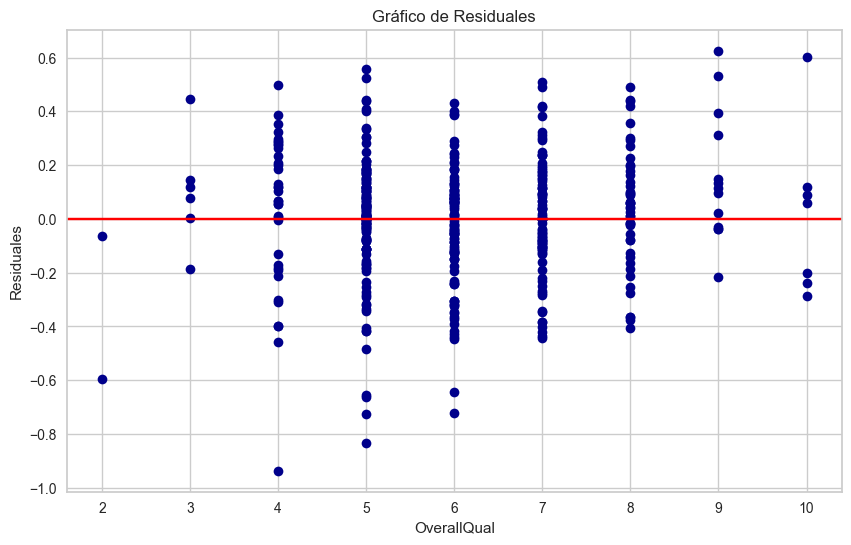

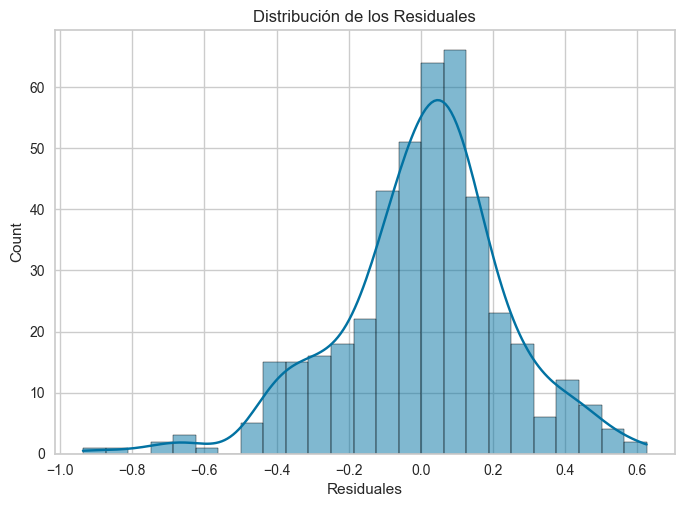

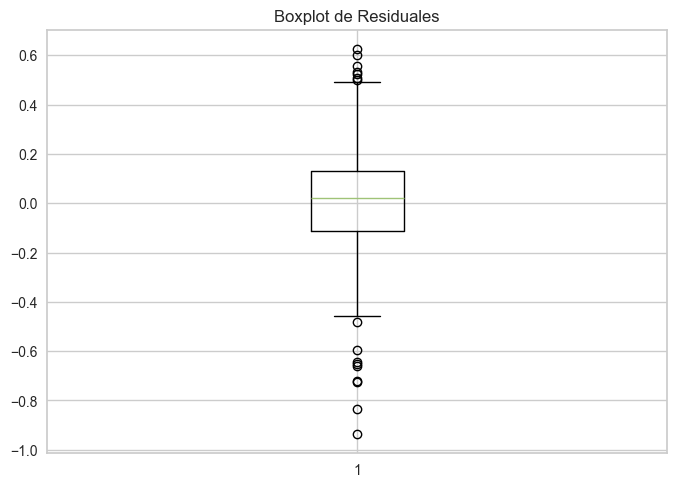

In [14]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_test_values, residuales, 'o', color='darkblue')
plt.axhline(0, color='red')
plt.title("Gráfico de Residuales")
plt.xlabel("OverallQual")
plt.ylabel("Residuales")
plt.grid(True)
plt.show()

# Histograma
sns.histplot(residuales, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

# Boxplot 
plt.boxplot(residuales)
plt.title("Boxplot de Residuales")
plt.show()

#### Prueba de normalidad de residuos


In [15]:
normaltest(residuales)

NormaltestResult(statistic=np.float64(28.201766956875616), pvalue=np.float64(7.517338650922479e-07))

#### Yellowbrick de residuales


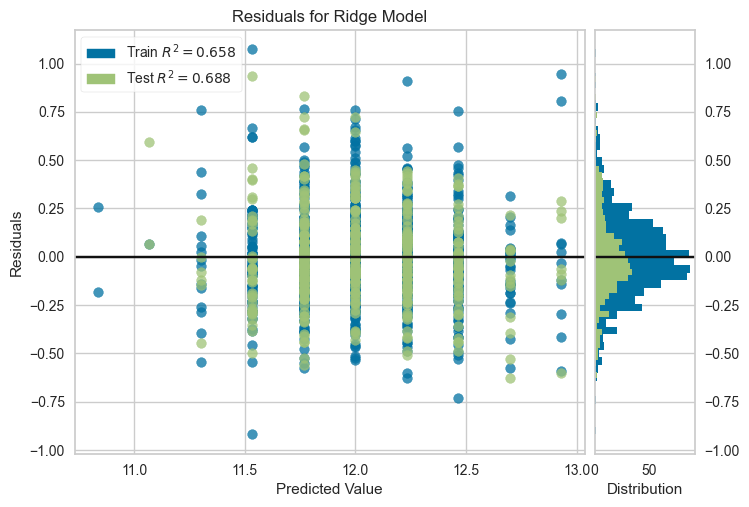

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(x_train_values, y_train_values)  
visualizer.score(x_test_values, y_test_values)  
visualizer.show()

#### Analisis de coeficientes


In [17]:
est = sm.OLS(y_train_values, x_train_values)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          2.628e+04
Date:                Sat, 01 Mar 2025   Prob (F-statistic):                        0.00
Time:                        23:12:17   Log-Likelihood:                         -2310.7
No. Observations:                1021   AIC:                                      4623.
Df Residuals:                    1020   BIC:                                      4628.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Agregando intercepto


In [18]:
x_train_values = sm.add_constant(x_train_values)
est = sm.OLS(y_train_values, x_train_values)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          8.00e-240
Time:                        23:12:19   Log-Likelihood:                 50.625
No. Observations:                1021   AIC:                            -97.25
Df Residuals:                    1019   BIC:                            -87.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6007      0.033    320.912      0.0

#### Detección de overfitting


In [19]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5 folds
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.70059567 0.62348661 0.67142761 0.63027549 0.63776027]
Mean score: 0.6527091292606679


#### Análisis final de MRL Univariable


<small>

En este análisis se desarrolló un modelo de regresión lineal univariado (MRL), cuyo objetivo es predecir el logaritmo del precio de las viviendas (log(SalePrice)) utilizando como único predictor la variable _OverallQual_, que representa la calidad general de la construcción. Esta variable fue seleccionada debido a que, según el análisis exploratorio inicial, presenta la mayor correlación individual con SalePrice, con un coeficiente de aproximadamente 0.79, lo cual indica una relación lineal fuerte.

Debido a que SalePrice fue transformada usando logaritmo natural (log), los resultados del modelo ya no se expresan directamente en unidades monetarias, sino en términos logarítmicos, lo cual mejora la linealidad y estabilidad del modelo. Esta transformación es especialmente útil para datos inmobiliarios, donde los precios tienden a seguir distribuciones sesgadas hacia la derecha.

**División de los datos**
El dataset fue dividido en dos partes:

- Entrenamiento: 70% de los datos.
- Prueba: 30% de los datos.

El modelo fue entrenado sobre el conjunto de entrenamiento y posteriormente evaluado sobre el conjunto de prueba para medir su capacidad de generalización.

**Ecuación ajustada**

La ecuación resultante de la regresión fue: log(SalePrice)=0.2331 \* OverallQual + 10.6007

Esto significa que, por cada unidad adicional de OverallQual, se espera un incremento promedio de aproximadamente _23.31%_ en el precio de la vivienda en escala logarítmica.

### **Resultados**

**Métricas de desempeño**

Al evaluar el modelo sobre el conjunto de prueba, se obtuvieron las siguientes métricas:

- Error Cuadrático Medio (MSE): 0.05
- Coeficiente de Determinación (R²): 0.69

Máxima diferencia observada (error absoluto máximo):

- Índice: 197
- Valor real: 10.60 (log(SalePrice))
- Valor predicho: 11.53 (log(SalePrice))
- Diferencia: 0.94

**Prueba de normalidad de residuales**

- Stat = 28.20
- p-value = 7.52e-07

Esto indica que los residuales no siguen una distribución normal, lo cual es común en modelos simplificados como este, y especialmente cuando la variable objetivo tiene alta variabilidad estructural que una sola variable no puede capturar completamente.

**Gráfica de dispersión: Predicción vs Real**

La gráfica muestra una relación claramente ascendente, lo cual es lógico (a mayor calidad general, mayor precio logarítmico). Sin embargo, hay cierta dispersión vertical dentro de cada nivel de _OverallQual_, lo cual sugiere que el modelo es incapaz de capturar completamente la variabilidad del precio usando solo esta variable.

**Gráfico de Residuales**

El gráfico de residuales muestra una dispersión que no es completamente aleatoria, aunque se ha reducido el efecto de abanico (heterocedasticidad) comparado con el modelo sin transformación logarítmica. Sin embargo, sigue existiendo una mayor dispersión en calidades intermedias, lo que sugiere que dentro de esos rangos, otros factores (como tamaño, ubicación o antigüedad) juegan un rol importante que el modelo univariado no captura.

**Distribución de Residuales**

El histograma de residuales muestra una forma aproximadamente normal, aunque con ligera asimetría negativa. Esta distribución es mucho más controlada que en el modelo previo sin transformación logarítmica, lo cual es un efecto positivo de aplicar el log.

**Boxplot de Residuales**

El boxplot confirma la presencia de outliers, pero la cantidad es menor que en el modelo original. Estos outliers probablemente representan propiedades con características únicas (ubicación excepcional, lujos especiales o condiciones específicas no reflejadas en OverallQual).

**Residuales con Yellowbrick**

El R² obtenido en esta visualización es similar (0.69), lo cual confirma la consistencia de la evaluación. Sin embargo, el patrón de residuales sigue mostrando el mismo problema de heterocedasticidad.

**Validación Cruzada**

La validación cruzada arrojó los siguientes resultados:

- Cross-validation scores: [0.7006, 0.6235, 0.6714, 0.6303, 0.6378]
- Promedio: 0.6527

Esto muestra un desempeño moderado, lo cual es esperable al trabajar con un modelo univariado en un contexto tan complejo como el de precios inmobiliarios. El modelo tiene cierta sensibilidad a la partición de los datos, reflejada en la variabilidad de los scores entre folds.

### **Interpretación de resultados**

El desempeño general del modelo es limitado _(R² de 0.69)_, lo que confirma que OverallQual, aunque es un predictor relevante, es insuficiente por sí sola para capturar toda la complejidad del mercado inmobiliario. El modelo es claramente simplista y deja sin explicar buena parte de la variabilidad en el precio. Sin embargo, al aplicar la transformación logarítmica, se observan mejoras claras en:

- Linealidad de la relación entre calidad y precio logarítmico.
- Reducción parcial de la heterocedasticidad.
- Mejora en la distribución de residuales.

Esto valida el beneficio de transformar precios en este tipo de análisis. No obstante, sigue siendo evidente que para mejorar el desempeño predictivo, es necesario un enfoque multivariable que incorpore variables adicionales como tamaño, ubicación, antigüedad y amenidades.

</small>
